### Τεχνικές Εξόρυξης Δεδομένων - 2η Άσκηση


---



*   Iωάννης Καπετανγεώργης | 1115201800061
*   Δημήτριος Σιταράς | 1115201800178

---

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip -qq /content/gdrive/MyDrive/TeDe\ Project2/News_dataset.zip

In [ ]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
Location = r'True.csv'
trueDf = pd.read_csv(Location)

Location = r'Fake.csv'
falseDf = pd.read_csv(Location)

## **Ερώτημα 1** - Προεπεξεργασία/Καθάρισμα


---


Αρχικά αφαιρούμε όσες γραμμές περιέχουν κάποια null τιμή.Στα συγκεκριμένα αρχεία βέβαια, παρατηρίσαμε πως δεν υπάρχουν τέτοιες γραμμές.
Στην συνέχεια σε κάθε ένα πεδίο (title,text,subject,date) εφαρμόζουμε "καθαρισμό" των δεδομένων. Πιο συγκεκριμένα, μετατρέπουμε όλες τις λέξεις σε πεζά γράμματα και αφαιρούμε οποιαδήποτε σύμβολα και σημεία στίξης.

In [ ]:
trueDf = trueDf.dropna()
falseDf = falseDf.dropna()

In [ ]:
# erwtima 1 - afairesh shmeiwn stikshs kai metatroph se lower-case
import string
punctuations = list(string.punctuation)
punctuations.append('–')

def canonicate(text):
    text = text.lower()
    for punctuation in punctuations:
        text = text.replace(punctuation, '')
    return text

columnList = list(trueDf.columns)
for column in columnList:
  trueDf[column] = trueDf[column].apply(canonicate)

columnList = list(falseDf.columns)
for column in columnList:
  falseDf[column] = falseDf[column].apply(canonicate)


## **Ερώτημα 2** - Μελέτη των δεδομένων

### **Ερώτημα 2.α**

----------------------

Μελετάμε όλους τους τίτλους. Κάθε τίτλο τον "σπάμε" σε λέξεις, και κατασκευάζουμε ένα dictionary το οποίο έχει σαν κλειδιά τις λέξεις που εμφανίστηκαν σε κάποιον τίτλο και σαν τιμή τον αριθμό τον φορών που εμφανίστηκε η κάθε λέξη στο σύνολο των τίτλών. Σε όλη αυτή την διαδικασία έχουμε αφαιρέσει τα stopwords.

Έτσι για κάθε λέξη γνωρίζουμε το πόσες φορές έχει εμφανιστεί στο σύνολο των τίτλων. Ταξινομώντας αυτό το dictionary βρίσκουμε τις δημοφιλέστερες λέξεις που περιέχονται στους τίτλους. Παρατηρώντας τις δημοφιλέστερες λέξεις μπορούμε εύκολα να καταλάβουμε την δημοφιλέστερη θεματολογία των τίτλων.

Για να οπτικοποιήσουμε την πληροφορία αυτή, δημιουργούμε ένα bar plot το οποίο περιέχει τις 50 δημοφιλέστερες λέξεις στους τίτλους καθώς και τον αντίστοιχο αριθμό τον φορών που περιέχονται σε αυτούς.

Επίσης, ακολουθουθούν δύο αντίστοιχα wordclouds που αναπαριστούν την ίδια πληροφορία.

Την παραπάνω διαδικασία εφαρμόζουμε τόσο για το True.csv όσο και για το False.csv

***Σχολιασμός Αποτελεσμάτων:***

Παρατηρούμε ότι η δημοφιλέστερη λέξη στα αληθή άρθρα είναι το όνομα Trump. Αντίστοιχα, στα ψευδή άρθρα είναι η δεύτερη δημοφιλέστερη λέξη. Επίσης παρατηρούμε και αρκετές άλλες δημοφιλείς λέξεις πολιτικού περιεχομένου. Επομένως, συμπεραίνουμε ότι τα περισσότερα άρθρα αφορούν πολιτικές ειδήσεις.

Μια ακόμα παρατήρηση είναι ότι η δημοφιλέστερη λέξη είναι η λέξη video καθώς και η τρίτη δημοφιλέστερη είναι η λέξη watch (η οποία σχετίζεται τις περισσότερες φορές με την λέξη video). Από αυτό συμπεραίνουμε πως τα ψευδή άρθρα προσπαθούν να προσελκύσουν τους αναγνώστες τους με την χρήση των videos.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
# erwtima 2.a euresh twn pio sunithismenwn lekewn stous titlous true/false
stop_words = stopwords.words('english')
trueTitles = list(trueDf['title'])
trueTokens = [sent.lower().split() for sent in trueTitles]
trueWordCount = {}
for senteceTokens in trueTokens:
  for token in senteceTokens:
    if token in stop_words:
      continue
    if token in trueWordCount:
      trueWordCount[token] = trueWordCount[token] + 1
    else:
      trueWordCount[token] = 1
trueWordCount = {k: v for k, v in sorted(trueWordCount.items(), key=lambda item: item[1],reverse=True)}

falseTitles = list(falseDf['title'])
falseTokens = [sent.lower().split() for sent in falseTitles]
falseWordCount = {}
for senteceTokens in falseTokens:
  for token in senteceTokens:
    if token in stop_words:
      continue
    if token in falseWordCount:
      falseWordCount[token] = falseWordCount[token] + 1
    else:
      falseWordCount[token] = 1
falseWordCount = {k: v for k, v in sorted(falseWordCount.items(), key=lambda item: item[1],reverse=True)}

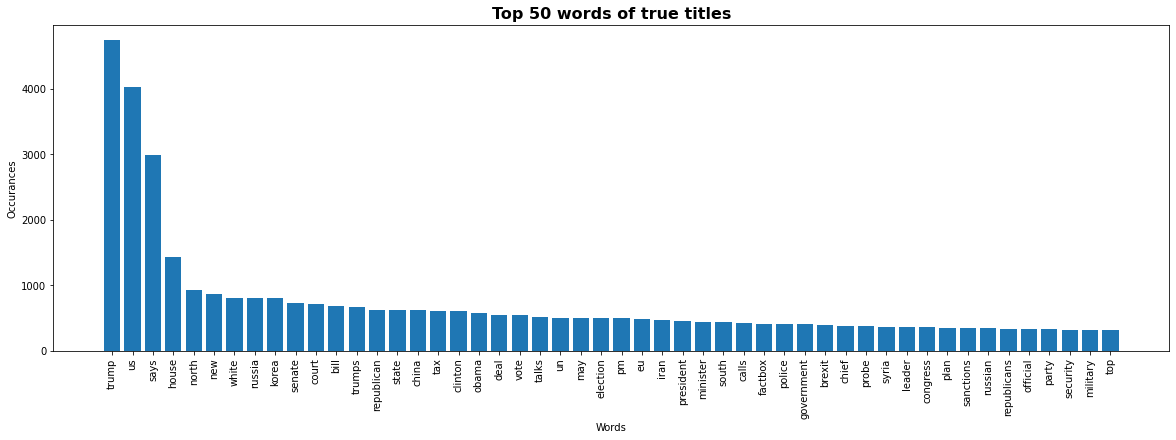

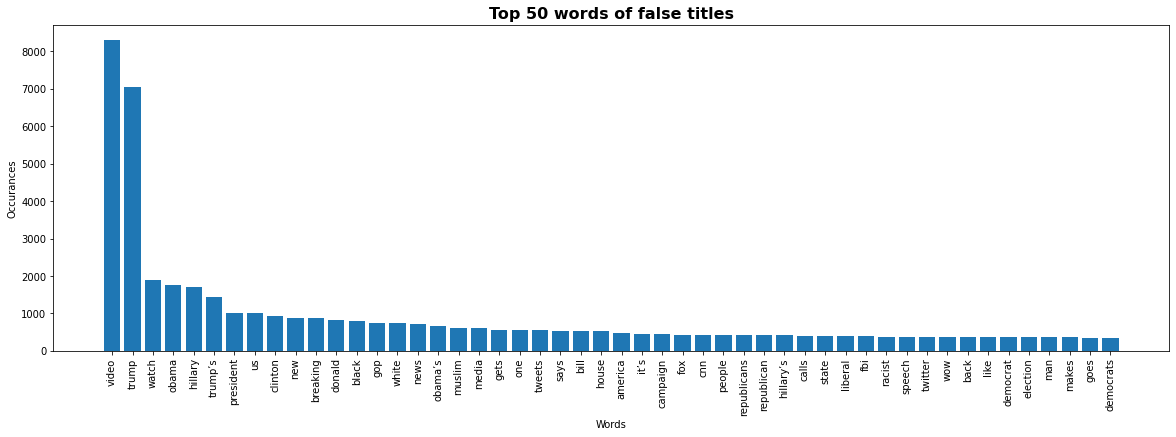

In [ ]:
# erwtima 2.a plot
import itertools 

def plot_top_words(wordDict,true_false):
  top20 = dict(itertools.islice(wordDict.items(), 50))
  plt.figure(figsize=(20, 6))
  plt.bar(range(len(top20)), top20.values(), align='center')
  plt.xticks(range(len(top20)), top20.keys())
  plt.xticks(rotation = 90)
  tile = 'Top 50 words of '+true_false+' titles'
  plt.title(tile,fontsize = 16, fontweight="bold")
  plt.ylabel('Occurances');
  plt.xlabel('Words');
  plt.show()

plot_top_words(trueWordCount,'true')
plot_top_words(falseWordCount,'false')

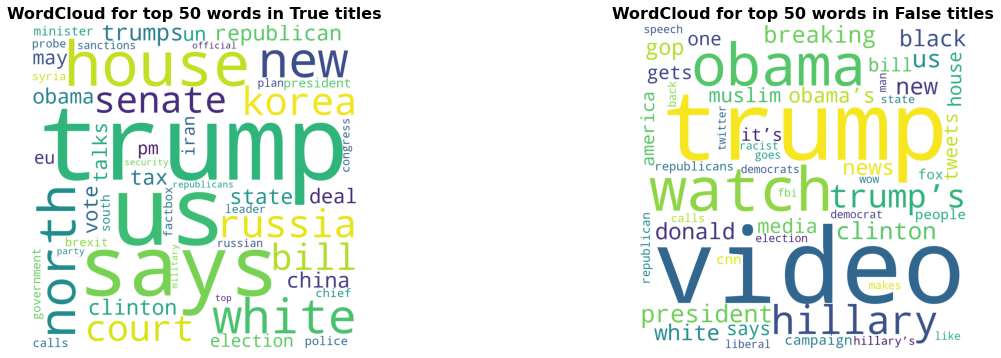

In [ ]:
# erwtima 2.a wordcloud
from PIL import Image
from wordcloud import WordCloud

wcTrue = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(trueWordCount)
wcFalse = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(falseWordCount)

plt.subplots(figsize=(20, 6))
plt.subplot(1,2,1)
plt.imshow(wcTrue)
plt.title('WordCloud for top 50 words in True titles',fontsize = 16, fontweight="bold")
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(wcFalse)
plt.title('WordCloud for top 50 words in False titles',fontsize = 16, fontweight="bold")
plt.axis("off");


### **Ερωτήματα 2.β, 2.γ, 2.δ**

----------------------

Οι πληροφορίες για τα τρία αυτά ερωτήματα υπολογίζονται στα ίδια loops έτσι ώστε να μην χρειάζεται να διατρέχουμε όλα τα άρθρα τρείς φορές.

Οι πληροφορίες που υπολογίζονται σε κάθε ένα από τα ερωτήματα παρουσιάζονται μέσω bar plots στην συνέχεια.

#### **Ερώτημα 2.β**

----------------------
Για το ερώτημα αυτό, υπολογίζονται:
* Ο συνολικός αριθμός χαρακτήρων χωρίς τα stopwords σε όλα τα Titles του True.csv και στην συνέχεια υπολογίζεται ο μέσος όρος τους. Η πληροφορία αυτή αποθηκεύεται στην μεταβλητή true_CharsWithoutStop.
* Ο συνολικός αριθμός χαρακτήρων μαζί με τα stopwords σε όλα τα Titles του True.csv και στην συνέχεια υπολογίζεται ο μέσος όρος τους. Η πληροφορία αυτή αποθηκεύεται στην μεταβλητή true_CharsWithStop.
* Ο συνολικός αριθμός χαρακτήρων χωρίς τα stopwords σε όλα τα Titles του False.csv και στην συνέχεια υπολογίζεται ο μέσος όρος τους. Η πληροφορία αυτή αποθηκεύεται στην μεταβλητή false_CharsWithoutStop.
* Ο συνολικός αριθμός χαρακτήρων μαζί με τα stopwords σε όλα τα Titles του False.csv και στην συνέχεια υπολογίζεται ο μέσος όρος τους. Η πληροφορία αυτή αποθηκεύεται στην μεταβλητή false_CharsWithStop.

Οι αντίστοιχες πληροφορίες υπολογίζονται και για τα texts και αποθηκέυονται στις μεταβλητές true_CharsTextWithoutStop, true_CharsTextWithStop, false_CharsTextWithoutStop, false_CharsTextWithStop αντίστοιχα.

#### **Ερώτημα 2.γ**

----------------------
* Ο συνολικός αριθμός λέξεων μαζί με τα stopwords σε όλα τα Titles του True.csv και στην συνέχεια υπολογίζεται ο μέσος όρος τους. Η πληροφορία αυτή αποθηκεύεται στην μεταβλητή true_WordsWithStop.
* Ο συνολικός αριθμός λέξεων μαζί με τα stopwords σε όλα τα Titles του False.csv και στην συνέχεια υπολογίζεται ο μέσος όρος τους. Η πληροφορία αυτή αποθηκεύεται στην μεταβλητή false_WordsWithStop.

Οι αντίστοιχες πληροφορίες υπολογίζονται και για τα texts και αποθηκέυονται στις μεταβλητές true_WordsTextWithStop και false_WordsTextWithStop αντίστοιχα.

#### **Ερώτημα 2.δ**

----------------------
* Ο συνολικός αριθμός λέξεων χωρίς τα stopwords σε όλα τα Titles του True.csv και στην συνέχεια υπολογίζεται ο μέσος όρος τους. Η πληροφορία αυτή αποθηκεύεται στην μεταβλητή true_WordsWithoutStop.
* Ο συνολικός αριθμός λέξεων χωρίς τα stopwords σε όλα τα Titles του False.csv και στην συνέχεια υπολογίζεται ο μέσος όρος τους. Η πληροφορία αυτή αποθηκεύεται στην μεταβλητή false_WordsWithoutStop.

Οι αντίστοιχες πληροφορίες υπολογίζονται και για τα texts και αποθηκέυονται στις μεταβλητές true_WordsTextWithoutStop και false_WordsTextWithoutStop αντίστοιχα.

In [ ]:
# erwtima 2.b/2.g/2.d gia to Title
true_CharsWithStop = 0 # arithmos xaraktirwn twn Titles (mazi me ta stopwords) - True.csv
true_CharsWithoutStop = 0 # arithmos xaraktirwn twn Titles (xwris ta stopwords) - True.csv
true_WordsWithStop = 0  # arithmos leksewn twn Titles (mazi me ta stopwords) - True.csv
true_WordsWithoutStop = 0 # arithmos leksewn twn Titles (xwris ta stopwords) - True.csv
for senteceTokens in trueTokens:
  true_WordsWithStop += len(senteceTokens)
  for token in senteceTokens:
    true_CharsWithStop += len(token)
    if token not in stop_words:
      true_CharsWithoutStop += len(token)
      true_WordsWithoutStop += 1

true_CharsWithStop = true_CharsWithStop / len(trueTokens)
true_CharsWithoutStop = true_CharsWithoutStop / len(trueTokens)
true_WordsWithStop = true_WordsWithStop / len(trueTokens)
true_WordsWithoutStop = true_WordsWithoutStop / len(trueTokens)

false_CharsWithStop = 0 # arithmos xaraktirwn twn Titles (mazi me ta stopwords) - False.csv
false_CharsWithoutStop = 0 # arithmos xaraktirwn twn Titles (xwris ta stopwords) - False.csv
false_WordsWithStop = 0  # arithmos leksewn twn Titles (mazi me ta stopwords) - False.csv
false_WordsWithoutStop = 0 # arithmos leksewn twn Titles (xwris ta stopwords) - False.csv
for senteceTokens in falseTokens:
  false_WordsWithStop += len(senteceTokens)
  for token in senteceTokens:
    false_CharsWithStop += len(token)
    if token not in stop_words:
      false_CharsWithoutStop += len(token)
      false_WordsWithoutStop += 1

false_CharsWithStop = false_CharsWithStop / len(falseTokens)
false_CharsWithoutStop = false_CharsWithoutStop / len(falseTokens)
false_WordsWithStop = false_WordsWithStop / len(falseTokens)
false_WordsWithoutStop = false_WordsWithoutStop / len(falseTokens)

In [ ]:
trueText = list(trueDf['text'])
trueTextTokens = [sent.lower().split() for sent in trueText]

falseText = list(falseDf['text'])
falseTextTokens = [sent.lower().split() for sent in falseText]

In [ ]:
# erwtima 2.b/2.g/2.d gia to Text
true_CharsTextWithStop = 0  # arithmos xaraktirwn twn Texts (mazi me ta stopwords) - True.csv
true_CharsTextWithoutStop = 0 # arithmos xaraktirwn twn Texts (xwris ta stopwords) - True.csv
true_WordsTextWithStop = 0 # arithmos leksewn twn Texts (mazi me ta stopwords) - True.csv
true_WordsTextWithoutStop = 0 # arithmos leksewn twn Texts (xwris ta stopwords) - True.csv
for senteceTokens in trueTextTokens:
  true_WordsTextWithStop += len(senteceTokens)
  for token in senteceTokens:
    true_CharsTextWithStop += len(token)
    if token not in stop_words:
      true_CharsTextWithoutStop += len(token)
      true_WordsTextWithoutStop += 1

true_CharsTextWithStop = true_CharsTextWithStop / len(trueTextTokens)
true_CharsTextWithoutStop = true_CharsTextWithoutStop / len(trueTextTokens)
true_WordsTextWithStop = true_WordsTextWithStop / len(trueTextTokens)
true_WordsTextWithoutStop = true_WordsTextWithoutStop / len(trueTextTokens)

false_CharsTextWithStop = 0 # arithmos xaraktirwn twn Texts (mazi me ta stopwords) - False.csv
false_CharsTextWithoutStop = 0  # arithmos xaraktirwn twn Texts (xwris ta stopwords) - False.csv
false_WordsTextWithStop = 0  # arithmos leksewn twn Texts (mazi me ta stopwords) - False.csv
false_WordsTextWithoutStop = 0 # arithmos leksewn twn Texts (xwris ta stopwords) - False.csv
for senteceTokens in falseTextTokens:
  false_WordsTextWithStop += len(senteceTokens)
  for token in senteceTokens:
    false_CharsTextWithStop += len(token)
    if token not in stop_words:
      false_CharsTextWithoutStop += len(token)
      false_WordsTextWithoutStop += 1

false_CharsTextWithStop = false_CharsTextWithStop / len(falseTextTokens)
false_CharsTextWithoutStop = false_CharsTextWithoutStop / len(falseTextTokens)
false_WordsTextWithStop = false_WordsTextWithStop / len(falseTextTokens)
false_WordsTextWithoutStop = false_WordsTextWithoutStop / len(falseTextTokens)

In [ ]:
def plotCounts(trueCount1,falseCount1,trueCount2,falseCount2,words_chars,text_title):
  plt.subplots(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.bar(range(2), [trueCount1 , falseCount1], align='center')
  plt.xticks(range(2), ['True','False'])
  plt.ylabel('Number Of '+words_chars);
  plt.title('Mean Number Of '+words_chars+' in '+text_title+' (including stopwords)',fontsize = 16, fontweight="bold")

  plt.subplot(1,2,2)
  plt.bar(range(2), [trueCount2 , falseCount2], align='center')
  plt.xticks(range(2), ['True','False'])
  plt.ylabel('Number Of Characters');
  plt.title('Mean Number Of '+words_chars+' in '+text_title+' (without stopwords)',fontsize = 16, fontweight="bold")
  plt.show()

Από το παρακάτω plot παρατηρούμε ότι οι τίτλοι των Fake άρθων είναι αρκετά μεγαλύτεροι, δηλαδή περιέχουν πολύ περισσότερους χαρακτήρες (είτε περιέχουν τα stopwords είτε όχι).

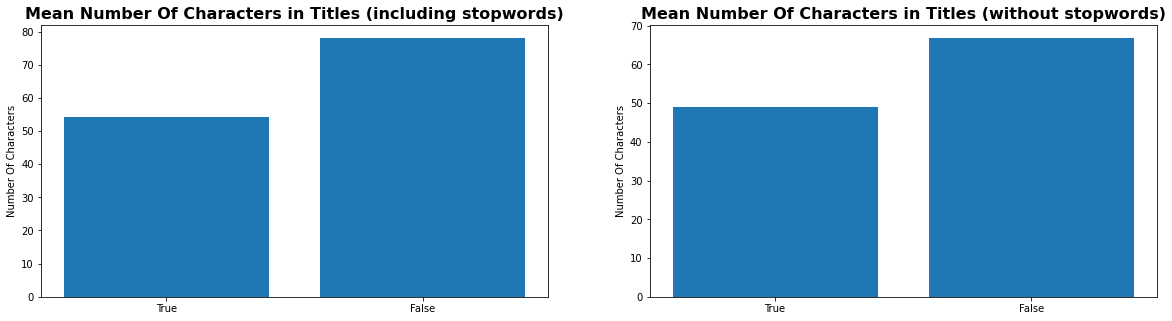

In [ ]:
#erwtima 2.b - Titles
plotCounts(true_CharsWithStop,false_CharsWithStop,true_CharsWithoutStop,false_CharsWithoutStop,'Characters','Titles')

Όσον αφορά τα texts, παρατηρούμε ότι τα Fake άρθρα περιέχουν παρόμοιο αριθμό χαρακτήρων με τα True. Πιο συγκεκριμένα, χωρίς να έχουμε αφαιρέσει τα stopwords παρατηρούμε ότι τα texts των Fake άρθρων είναι ελάχιστα μεγαλύτερα. Αφαιρόντας όμως τα stopwords παρατηρούμε ότι έχουν σχεδόν ίσο αριθμό χαρακτήρων.

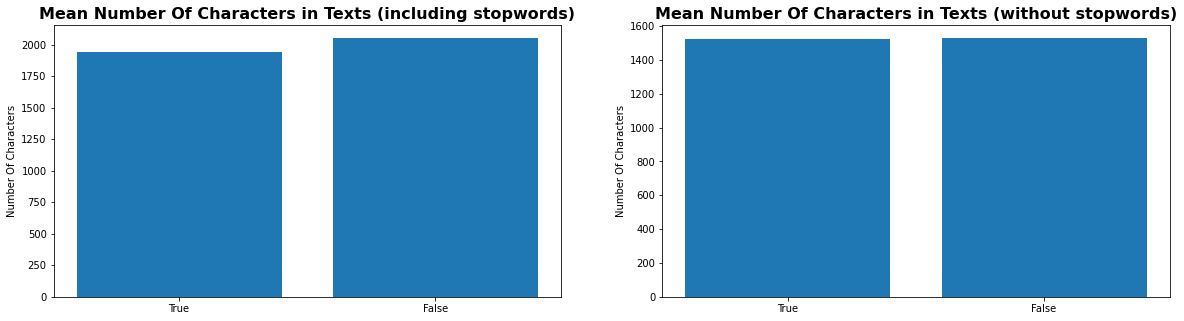

In [ ]:
#erwtima 2.b - Texts
plotCounts(true_CharsTextWithStop,false_CharsTextWithStop,true_CharsTextWithoutStop,false_CharsTextWithoutStop,'Characters','Texts')

Παρόμοια αποτελέσματα παίρνουμε και όταν μετρήσουμε τις λέξεις αντί για τους χαρακτήρες.

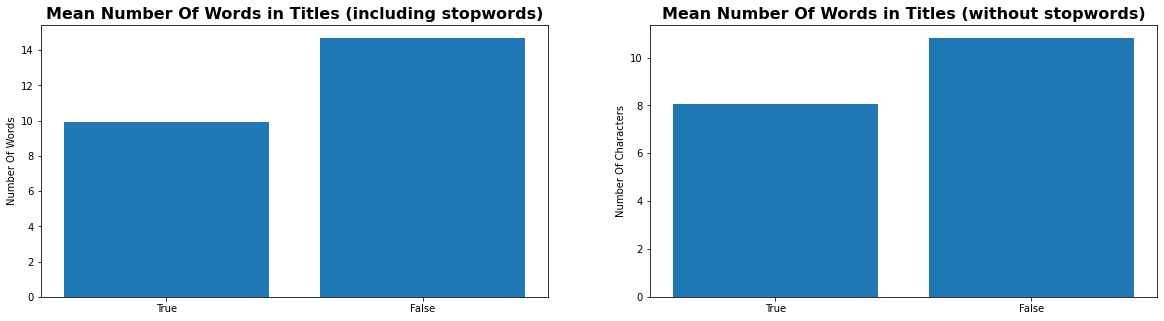

In [ ]:
#erwtima 2.g/2.d - Titles
plotCounts(true_WordsWithStop,false_WordsWithStop,true_WordsWithoutStop,false_WordsWithoutStop,'Words','Titles')

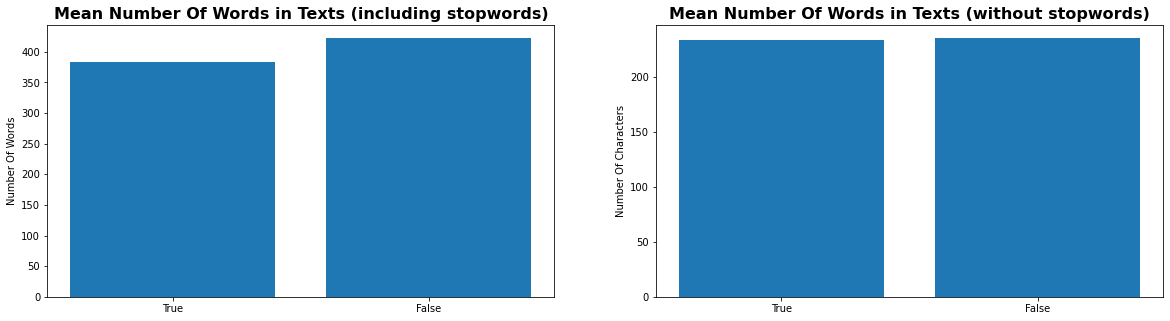

In [ ]:
#erwtima 2.g/2.d - Texts
plotCounts(true_WordsTextWithStop,false_WordsTextWithStop,true_WordsTextWithoutStop,false_WordsTextWithoutStop,'Words','Texts')

### **Ερώτημα 2.ε**

----------------------
Αρχικά υπολογίζονται τα εξής bigrams μέσω του CountVectorizer:
* Bigrams των όλων τίτλων του True.csv
* Bigrams των όλων τίτλων του False.csv
* Bigrams των όλων texts του True.csv
* Bigrams των όλων texts του False.csv

Για κάθε έναν από τους πίνακες με τα bigram που προκύπτει, τον αθροίζουμε κατα στήλες. Έτσι, τελικα έχουμε έναν πίνακα όπου κάθε στήλη αντίστοιχει σε ένα bigram και περιέχει μία γραμμή με τον αριθμό των φορών που εμφανίζεται στα titles/texts.

Αποθηκέυουμε την πληροφορία αυτή σε ένα dictionary. Δηλαδή έχουμε την πληροφορία για το πόσες φορές εμφανίζεται το κάθε ένα bigram στο σύνολο των titles/texts.

Ταξινομούμε τα dictionaries και "κρατάμε" από κάθε ένα τα 20 δημοφιλέστερα bigrams. Τελικά αναπαριστούμε αυτές της πληροφορίες μέσω bar plots και wordclouds.

Επομένως, για κάθε έναν συνδιασμό True.csv/False.csv και titles/texts παρουσιάζονται τα 20 δημοφιλέστερα bigrams καθώς και ο αντίστοιχος αριθμός τον φορών που εμφανίστηκαν.

In [ ]:
# erwtima 2.e - Titles - True.csv
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

trueTitles = list(trueDf['title'])
# bow for Titles - True.csv
bigram_bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=200000, stop_words='english',ngram_range=(2,2))
bigram_bow = bigram_bow_vectorizer.fit_transform(trueTitles)
terms = bigram_bow_vectorizer.get_feature_names()
freqs = bigram_bow.sum(axis=0).A1
result = dict(zip(terms, freqs))
bigramTrueTitles = {k: v for k, v in sorted(result.items(), key=lambda item: item[1],reverse=True)}

In [ ]:
# erwtima 2.e - Titles - False.csv
falseTitles = list(falseDf['title'])
# bow for Titles - False.csv
bigram_bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=100000, stop_words='english',ngram_range=(2,2))
bigram_bow = bigram_bow_vectorizer.fit_transform(falseTitles)
terms = bigram_bow_vectorizer.get_feature_names()
freqs = bigram_bow.sum(axis=0).A1
result = dict(zip(terms, freqs))
bigramFalseTitles = {k: v for k, v in sorted(result.items(), key=lambda item: item[1],reverse=True)}

In [ ]:
import itertools
def plot_top_bigrams(wordDict,true_false,title_text):
  top15 = dict(itertools.islice(wordDict.items(), 20))
  plt.figure(figsize=(20, 5))
  plt.bar(range(len(top15)), top15.values(), align='center')
  plt.xticks(range(len(top15)), top15.keys())
  plt.xticks(rotation = 65)
  tile = 'Top 20 bigrams of '+true_false+' '+title_text
  plt.title(tile,fontsize = 16, fontweight="bold")
  plt.ylabel('Occurances');
  plt.xlabel('Bigrams');
  plt.show()

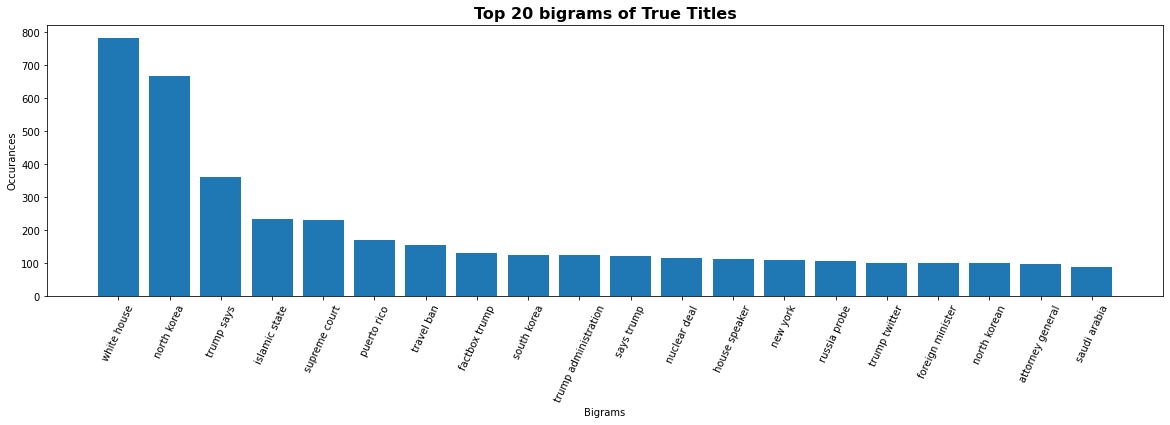

In [ ]:
plot_top_bigrams(bigramTrueTitles,'True','Titles')  # plot erwtima 2.e - Titles - True.csv

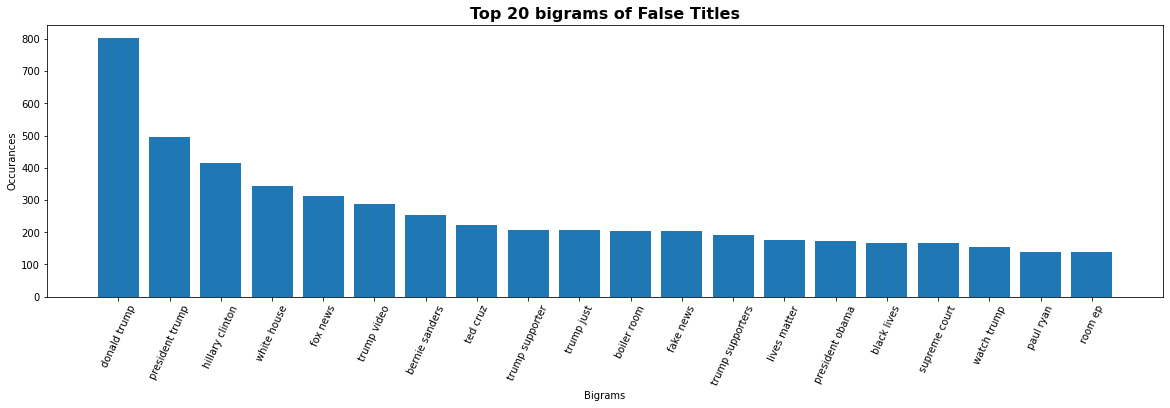

In [ ]:
plot_top_bigrams(bigramFalseTitles,'False','Titles')  # plot erwtima 2.e - Titles - False.csv

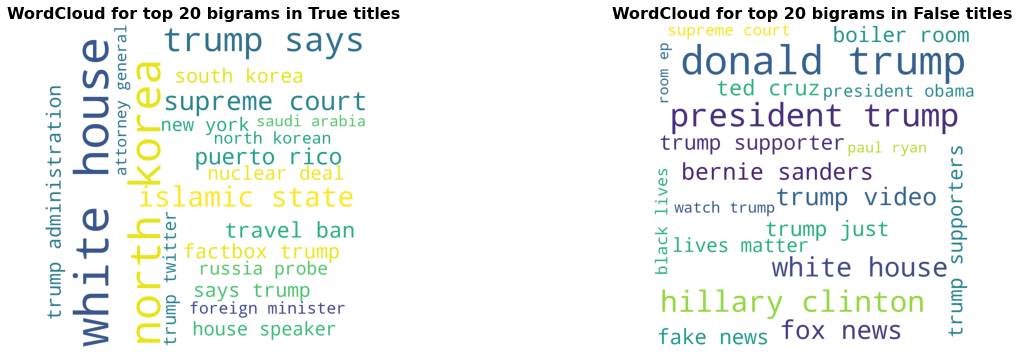

In [ ]:
# WordCloud for top 20 bigrams in True titles
wcTrueTitles = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(bigramTrueTitles)
# WordCloud for top 20 bigrams in False titles
wcFalseTitles = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(bigramFalseTitles)

plt.subplots(figsize=(20, 6))
plt.subplot(1,2,1)
plt.imshow(wcTrueTitles)
plt.title('WordCloud for top 20 bigrams in True titles',fontsize = 16, fontweight="bold")
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(wcFalseTitles)
plt.title('WordCloud for top 20 bigrams in False titles',fontsize = 16, fontweight="bold")
plt.axis("off");

In [ ]:
# erwtima 2.e - Texts - True.csv
trueText = list(trueDf['text'])
# bow for Texts - True.csv
bigram_bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=200000, stop_words='english',ngram_range=(2,2))
bigram_bow = bigram_bow_vectorizer.fit_transform(trueText)
terms = bigram_bow_vectorizer.get_feature_names()
freqs = bigram_bow.sum(axis=0).A1
result = dict(zip(terms, freqs))
bigramTrueText = {k: v for k, v in sorted(result.items(), key=lambda item: item[1],reverse=True)}

In [ ]:
# erwtima 2.e - Texts - False.csv
falseText = list(falseDf['text'])
# bow for Texts - False.csv
bigram_bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=200000, stop_words='english',ngram_range=(2,2))
bigram_bow = bigram_bow_vectorizer.fit_transform(falseText)
terms = bigram_bow_vectorizer.get_feature_names()
freqs = bigram_bow.sum(axis=0).A1
result = dict(zip(terms, freqs))
bigramFalseText = {k: v for k, v in sorted(result.items(), key=lambda item: item[1],reverse=True)}

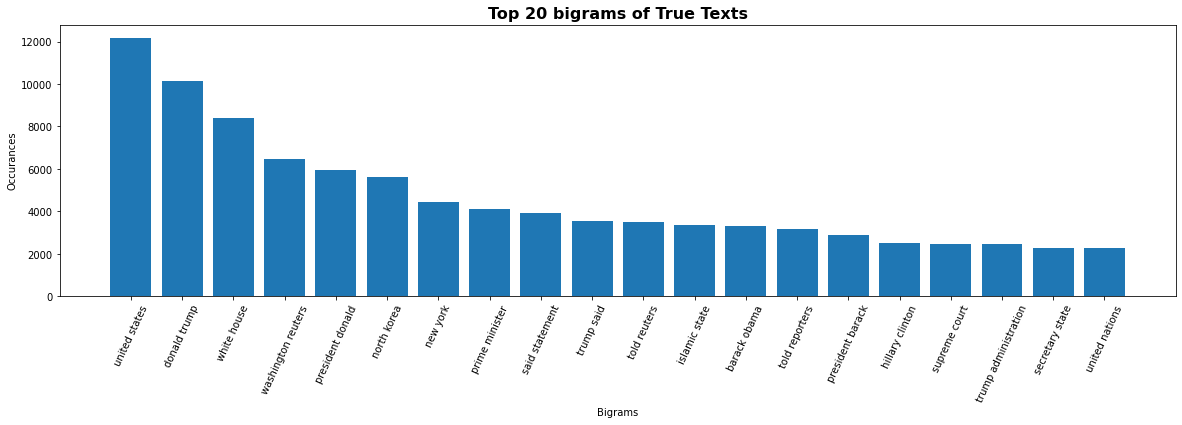

In [ ]:
plot_top_bigrams(bigramTrueText,'True','Texts') # plot erwtima 2.e - Texts - True.csv

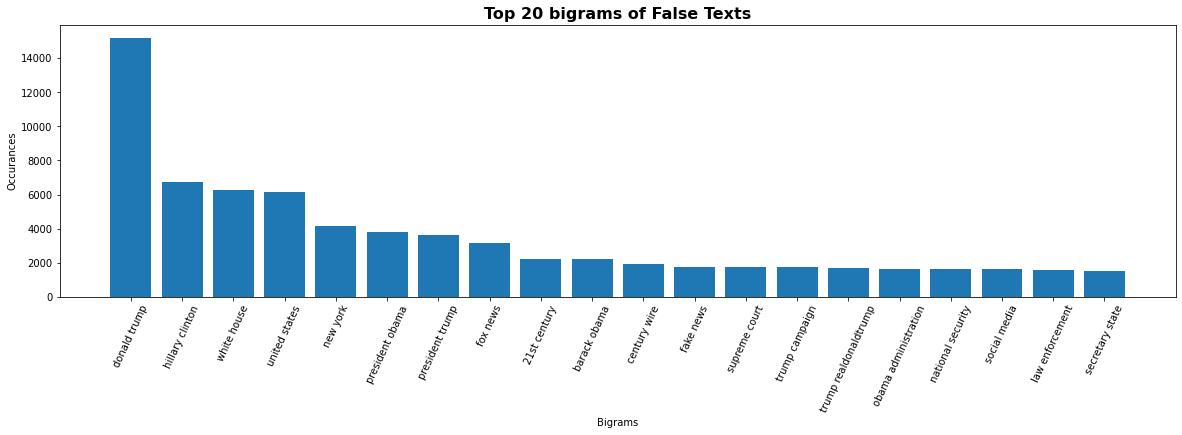

In [ ]:
plot_top_bigrams(bigramFalseText,'False','Texts') # plot erwtima 2.e - Texts - False.csv

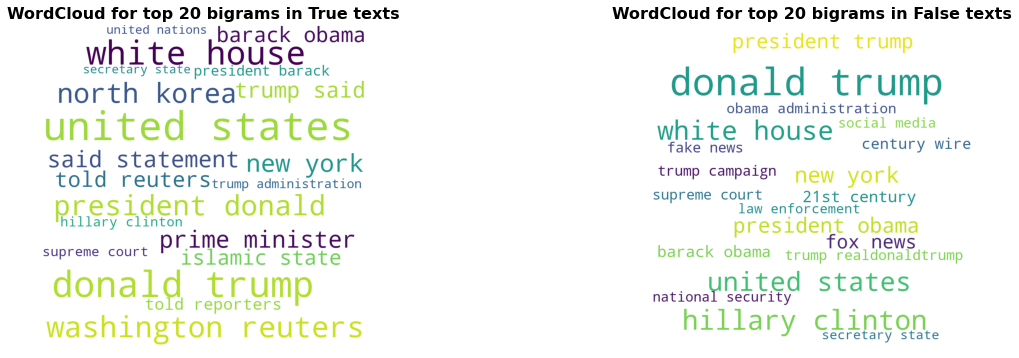

In [ ]:
# WordCloud for top 20 bigrams in True texts
wcTrueTexts = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(bigramTrueText)
# WordCloud for top 20 bigrams in False texts
wcFalseTexts = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(bigramFalseText)

plt.subplots(figsize=(20, 6))
plt.subplot(1,2,1)
plt.imshow(wcTrueTexts)
plt.title('WordCloud for top 20 bigrams in True texts',fontsize = 16, fontweight="bold")
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(wcFalseTexts)
plt.title('WordCloud for top 20 bigrams in False texts',fontsize = 16, fontweight="bold")
plt.axis("off");

## **Ερώτημα 3** - Δημιουργία συνόλου εκμάθησης και δοκιμής
--------------------------------------

Για την παραγωγή του train.csv ακολουθείται η εξής διαδικασία:
* Παίρνουμε το πρώτο 60% των "εγγραφών" του True.csv
* Προθέτουμε σε αυτό την νέα στήλη label με τιμή 1
* Παίρνουμε το πρώτο 60% των "εγγραφών" του False.csv
* Προθέτουμε σε αυτό την νέα στήλη label με τιμή 0
* Ενώνουμε τα δύο αυτά σύνολα σε ένα νέο dataframe
* Κάνουμε ένα τυχαίο shuffle των εγγραφών του νέο dataframe
* Αποθηκέυουμε το νέο αυτό dataframe σε ένα csv αρχείο με όνομα train.csv

Για την παραγωγή του test.csv ακολουθείται η ίδια ακριβώς διαδικασία για το υπόλοιπο 40%  των εγγραφών των αρχείων True.csv και False.csv.

In [ ]:
# erwtima 3 - train.csv
pd.options.mode.chained_assignment = None
trainSize = trueDf.shape[0] * 6 // 10 # 60% of true.csv
tempTrue = trueDf.head(trainSize)
tempTrue['label'] = 1
trainSize2 = falseDf.shape[0] * 6 // 10 # 60% of false.csv
tempFalse = falseDf.head(trainSize2)
tempFalse['label'] = 0
trainDf = pd.concat([tempTrue, tempFalse])
trainDf = trainDf.sample(frac=1).reset_index(drop=True)
trainDf.to_csv('train.csv', header=True, index=False)

In [ ]:
# erwtima 3 - test.csv
testSize = trueDf.shape[0] - trainSize
tempTrue = trueDf.tail(testSize)
tempTrue['label'] = 1
testSize2 = falseDf.shape[0] - trainSize2
tempFalse = falseDf.tail(testSize2)
tempFalse['label'] = 0
testDf = pd.concat([tempTrue, tempFalse])
testDf = testDf.sample(frac=1).reset_index(drop=True)
testDf.to_csv('test.csv', header=True, index=False)

Το μέγεθος του train set:

In [ ]:
trainDf.shape

(26938, 5)

Το μέγεθος του test set:

In [ ]:
testDf.shape

(17960, 5)

# **Μέρος 2** - Υλοποίηση Κατηγοριοποίησης Classification
--------------------------------------

Αρχικά διαβάζουμε τα 2 αρχεία train.csv και test.csv δημιουργόντας τα αντίστοιχα dataframes. Στην συνέχεια παίρνουμε από το κάθε ένα την στήλη text και την στήλη label (σε μορφή λίστας) έτσι ώστε να δημιουργηθούν τα σύνολα X και y.

Το σύνολο Χ περιέχει τα texts ενώ το σύνολο y περιέχει την πληροφορία για το αν το text στο αντίστοιχο index του X είναι true ή false.

In [ ]:
trainDf = pd.read_csv('train.csv')
X_train = list(trainDf['text'])
y_train = list(trainDf['label'])

testDf = pd.read_csv('test.csv')
X_test = list(testDf['text'])
y_test = list(testDf['label'])

Κατασκευάζουμε τους πίνακες BagOfWords και Tf-Idf για τα texts του train set μας (δηλαδή για το X_train).

Τα stopwords δεν λαμβάνονται υπόψιν καθώς παρατηρίσαμε καλύτερα αποτελέσματα χωρίς αυτά.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.95, min_df=0.005, max_features=200000, stop_words='english',ngram_range=(1,1)) # initialize the unigram CountVectorizer
BoW_train = bow_vectorizer.fit_transform(X_train)  # run the vectorizer for all the descriptions

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.005, max_features=100000, stop_words='english',ngram_range=(1,1)) #initialize the TfidfVectorizer
tfidf_train = tfidf_vectorizer.fit_transform(X_train)  # run the vectorizer for all the descriptions

## Classification χρησιμοποιώντας BoW
--------------------------------------

Μετατρέπουμε (transform) το test set (X_test) σε BoW αναπαράσταση χρησιμοποιόντας τον CountVectorizer με τον οποίο παράχθηκε η bow αναπαράσταση του train set.

Δημιουργούμε έναν Logistic Regression classifier και τον κάνουμε train (fit) με τον πίνακα BoW που προέκυψε από το X_train καθώς και με το y_train.

Στην συνέχεια καλούμε την predict δίνοντας σαν όρισμα το test set μας σε BoW αναπαράσταση (BoW_test).

O classifier μας επιστρέφει μια λίστα με τις "προβλέψεις" για το αν τα texts του test set είναι true η false. Αποθηκέυουμε αυτήν την λίστα έτσι ώστε να υπολογίσουμε το accuracy στην συνέχεια

In [ ]:
from sklearn.linear_model import LogisticRegression

BoW_test = bow_vectorizer.transform(X_test)

lr_classifier = LogisticRegression(C = 100,random_state = 0,max_iter=10000)
lr_classifier.fit(BoW_train, y_train)
lr_bow_predicted_y = lr_classifier.predict(BoW_test)

Ακολουθούμε ακριβώς την ίδια διαδικασία χρησιμοποιόντας τον Naive Bayes classifier.

Δημιουργούμε τον classifier, τον κάνουμε train με την BoW αναπαράσταση του train set μας και στην συνέχεια κάνουμε predict το test set.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clasifier = GaussianNB()
array = BoW_train.todense()
nb_clasifier.fit(array, y_train)
nb_bow_predicted_y = nb_clasifier.predict(BoW_test.todense())

Παρόμοια διαδικασία ακολουθούμε και για τον SVM.

Η διαφορά είναι ότι χρησιμοποιούμε την GridSearchCV έτσι ώστε να δοκιμάσει όλους τους συνδιασμούς των παραμέτρων kernel, C και gamma και να επιλέξει τον καλύτερο.

Έτσι, δημιουργούμε τον classifier, τον κάνουμε train και τελικά κάνουμε predict το train set μας.

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10],'gamma':('auto', 'scale')}
svc = svm.SVC()
svm_classifier = GridSearchCV(svc, parameters)
svm_classifier.fit(BoW_train, y_train)
svm_bow_predicted_y = svm_classifier.predict(BoW_test)

Παρατηρούμε ότι ο GridSearchCV εντόπισε τον παρακάτω συνδιασμό παραμέτρων ώς τον πιο αποδοτικό.

In [ ]:
svm_classifier.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Ακολουθούμε την ίδια διαδικασία και για τον classifier Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(BoW_train,y_train)
rf_bow_predicted_y = rf_classifier.predict(BoW_test)

## Classification χρησιμοποιώντας Tf-Idf
--------------------------------------

Μετατρέπουμε (transform) το test set (X_test) σε Tf-Idf αναπαράσταση χρησιμοποιόντας τον TfidfVectorizer με τον οποίο παράχθηκε η tf-idf αναπαράσταση του train set.

Δημιουργούμε έναν Logistic Regression classifier και τον κάνουμε train (fit) με τον πίνακα Tf-Idf που προέκυψε από το X_train καθώς και με το y_train.

Στην συνέχεια καλούμε την predict δίνοντας σαν όρισμα το test set μας σε BoW αναπαράσταση (BoW_test).

O classifier μας επιστρέφει μια λίστα με τις "προβλέψεις" για το αν τα texts του test set είναι true η false. Αποθηκέυουμε αυτήν την λίστα έτσι ώστε να υπολογίσουμε το accuracy στην συνέχεια

In [ ]:
tfidf_test = tfidf_vectorizer.transform(X_test)

lr_classifier = LogisticRegression(C = 100,random_state = 0,max_iter=10000)
lr_classifier.fit(tfidf_train, y_train)
lr_tfidf_predicted_y = lr_classifier.predict(tfidf_test)

Εφαρμογή του Naive Bayes classifier, ακολουθόντας την ίδια διαδικασία με προηγουμένως 

In [ ]:
nb_clasifier = GaussianNB()
nb_clasifier.fit(tfidf_train.todense(), y_train)
nb_tfidf_predicted_y = nb_clasifier.predict(tfidf_test.todense())

Εφαρμογή του SVM classifier, χρησιμοποιόντας τις βέλτιστες παραμέτρους που έχουν υπολογιστεί προηγουμένως μέσω της GridSearchCV

In [ ]:
svm_classifier = svm.SVC(C=10,gamma='auto',kernel='rbf')
svm_classifier.fit(tfidf_train, y_train)
svm_tfidf_predicted_y = svm_classifier.predict(tfidf_test)

Εφαρμογή του Random Forest classifier

In [ ]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(tfidf_train,y_train)
rf_tfidf_predicted_y = rf_classifier.predict(tfidf_test)

## Classification χρησιμοποιώντας Word2Vec
--------------------------------------

Χρησιμοποιούμε ένα pre-trained μοντέλο word2vec και συγκεκριμένα το glove-wiki-gigaword-100

In [ ]:
import gensim.downloader as api

# download the pretrained embeddings
glove_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


Χωρίζουμε σε tokens/λέξεις κάθε ένα text του train set και του test set

In [ ]:
from gensim.models import Word2Vec

X_train_tokens = [sent.lower().split() for sent in X_train]
X_test_tokens = [sent.lower().split() for sent in X_test]


Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να παραχθούν οι αναπαραστάσεις των texts χρησιμοποιόντας το pre-trained μοντέλο.

Πιο συγκεκριμένα:
* Η συνάρτηση findTextsFeatureVectors καλεί την συνάρτηση findAverageVector για κάθε ένα text έτσι ώστε να δημιουργηθεί η αναπαράσταση του.
* Η συνάρτηση findAverageVector δημιουργεί την αναπαράσταση ενός text. Δηλαδή για κάθε μια λέξη που περιέχεται στο text βρίσκει το διάνυσμα που αντιστοιχεί στην λέξη αυτή από το word2vec μοντέλο. Αφού βρεθούν τα διανύσματα όλων των λέξεων της πρότασης, υπολογίζεται ο μέσος όρος τους και προκύπτει το τελικό διάνυσμα το οποίο και αναπαριστά την πρόταση.

In [ ]:
def findAverageVector(words, model, num_features): # find the average vector of the words of a given text
    feature_vec = np.zeros((num_features,),dtype="float32")  # initialize
    wordCount = 0.
    w2v_vocab = set(model.index2word)  # the vocabulary of the model

    for word in words:  # for every word of the text
        if word in w2v_vocab: # if w2v model contains that word
            wordCount = wordCount + 1.
            feature_vec = np.add(feature_vec,model[word]) # add the vector of this word to the total vector
    
    feature_vec = np.divide(feature_vec, wordCount) # find the average of the total vector
    return feature_vec


def findTextsFeatureVectors(texts, model, num_features): # find the average feature vector for every text
    counter = 0
    textsFeatureVectors = np.zeros((len(texts),num_features), dtype='float32')  # initialize
    
    for text in texts:
        textsFeatureVectors[counter] = findAverageVector(text, model, num_features)
        counter = counter + 1
    return textsFeatureVectors

Παραγωγή των αναπαραστάσεων του train set

In [ ]:
trainDataVecs = findTextsFeatureVectors(X_train_tokens, glove_vectors, 100)

Παραγωγή των αναπαραστάσεων του test set

In [ ]:
testDataVecs  = findTextsFeatureVectors(X_test_tokens, glove_vectors, 100)

Κανονικοποίηση των αποτελεσμάτων (σε περίπτωση που περιέχουν nan ή άπειρο)

In [ ]:
trainDataVecs = np.nan_to_num(trainDataVecs,nan=0,posinf=1, neginf=-1)
testDataVecs = np.nan_to_num(testDataVecs,nan=0,posinf=1, neginf=-1)

Εφαρμογή του Logistic Regression classifier, ακολουθόντας την ίδια διαδικασία με προηγουμένως 

In [ ]:
lr_classifier = LogisticRegression(C = 100,random_state = 0,max_iter=10000)
lr_classifier.fit(trainDataVecs, y_train)
lr_w2v_predicted_y = lr_classifier.predict(testDataVecs)

Εφαρμογή του Naive Bayes classifier

In [ ]:
nb_clasifier = GaussianNB()
nb_clasifier.fit(trainDataVecs, y_train)
nb_w2v_predicted_y = nb_clasifier.predict(testDataVecs)

Εφαρμογή του SVM classifier, χρησιμοποιόντας τις βέλτιστες παραμέτρους που έχουν υπολογιστεί προηγουμένως μέσω της GridSearchCV

In [ ]:
svm_classifier = svm.SVC(C=10,gamma='auto',kernel='rbf')
svm_classifier.fit(trainDataVecs, y_train)
svm_w2v_predicted_y = svm_classifier.predict(testDataVecs)

Εφαρμογή του Random Forest Classifier 

In [ ]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(trainDataVecs,y_train)
rf_w2v_predicted_y = rf_classifier.predict(testDataVecs)

# Αποτελέσματα - Accuracy
--------------------------------------

Για την αξιολόγηση της απόδοσης των μεθόδων χρησιμοποιούμε τις εξής μετρικές:
 * Accuracy (accuracy_score) με παράμετρο normalize=True (το οποίο είναι και το default) έτσι ώστε να μας επιστρέψει το κλάσμα/ποσοστό των σωστών προβλέψεων σε σχέση με τις λανθασμένες.
 * F1 (f1_score). Επιλέξαμε την default τιμή της παραμέτρου average, δηλαδή average=binary. Η επιλογή αυτή έγινε καθώς τα y_test και predicted_y αποτελούνται μόνο από 0 και 1 καθώς κάθε κείμενο μπορεί να ανήκει μόνο σε μια από τις δυο κατηγορίες. Επίσης, στην περίπτωση μας μας ενδιαφέρει κυριώς η θετική κλάση επομένως θεωρήσαμε την παράμετρο binary ως την καλύτερη επιλογή.

#### **Σχόλια σχετικά με τις αποδόσεις των μεθόδων αλλά και γενικότερα για την διαδικασία του classification ακολουθούν μετά την παρουσίαση των αποτελεσμάτων.**

## Bag Of Words
--------------------------------------

In [ ]:
from sklearn.metrics import accuracy_score

lr_bow_accuracy = accuracy_score(y_test,lr_bow_predicted_y)
nb_bow_accuracy = accuracy_score(y_test,nb_bow_predicted_y)
svm_bow_accuracy = accuracy_score(y_test,svm_bow_predicted_y)
rf_bow_accuracy = accuracy_score(y_test,rf_bow_predicted_y)
print(" Classification using BoW Representation - Using Accuracy Metric")
print(" Logistic Regression accuracy: %.2f%%" %(lr_bow_accuracy*100))
print(" Naive Bayes accuracy: %.2f%%" %(nb_bow_accuracy*100))
print(" Support Vector Machines accuracy: %.2f%%" %(svm_bow_accuracy*100))
print(" Random Forest accuracy: %.2f%%" %(rf_bow_accuracy*100))

 Classification using BoW Representation - Using Accuracy Metric
 Logistic Regression accuracy: 98.79%
 Naive Bayes accuracy: 83.40%
 Support Vector Machines accuracy: 99.19%
 Random Forest accuracy: 98.80%


In [ ]:
from sklearn.metrics import f1_score

lr_bow_f1 = f1_score(y_test,lr_bow_predicted_y)
nb_bow_f1 = f1_score(y_test,nb_bow_predicted_y)
svm_bow_f1 = f1_score(y_test,svm_bow_predicted_y)
rf_bow_f1 = f1_score(y_test,rf_bow_predicted_y)
print(" Classification using BoW Representation - Using F1 Metric")
print(" Logistic Regression accuracy: %.2f%%" %(lr_bow_f1*100))
print(" Naive Bayes accuracy: %.2f%%" %(nb_bow_f1*100))
print(" Support Vector Machines accuracy: %.2f%%" %(svm_bow_f1*100))
print(" Random Forest accuracy: %.2f%%" %(rf_bow_f1*100))

 Classification using BoW Representation - Using F1 Metric
 Logistic Regression accuracy: 98.75%
 Naive Bayes accuracy: 84.67%
 Support Vector Machines accuracy: 99.16%
 Random Forest accuracy: 98.75%


## Tf-Idf
--------------------------------------

In [ ]:
lr_tfidf_accuracy = accuracy_score(y_test,lr_tfidf_predicted_y)
nb_tfidf_accuracy = accuracy_score(y_test,nb_tfidf_predicted_y)
svm_tfidf_accuracy = accuracy_score(y_test,svm_tfidf_predicted_y)
rf_tfidf_accuracy = accuracy_score(y_test,rf_tfidf_predicted_y)
print(" Classification using TFIDF Representation - Using Accuracy Metric")
print(" Logistic Regression accuracy: %.2f%%" %(lr_tfidf_accuracy*100))
print(" Naive Bayes accuracy: %.2f%%" %(nb_tfidf_accuracy*100))
print(" Support Vector Machines accuracy: %.2f%%" %(svm_tfidf_accuracy*100))
print(" Random Forest accuracy: %.2f%%" %(rf_tfidf_accuracy*100))

 Classification using TFIDF Representation - Using Accuracy Metric
 Logistic Regression accuracy: 98.06%
 Naive Bayes accuracy: 86.07%
 Support Vector Machines accuracy: 91.53%
 Random Forest accuracy: 99.05%


In [ ]:
lr_tfidf_f1 = f1_score(y_test,lr_tfidf_predicted_y)
nb_tfidf_f1 = f1_score(y_test,nb_tfidf_predicted_y)
svm_tfidf_f1 = f1_score(y_test,svm_tfidf_predicted_y)
rf_tfidf_f1 = f1_score(y_test,rf_tfidf_predicted_y)
print(" Classification using TFIDF Representation - Using F1 Metric")
print(" Logistic Regression accuracy: %.2f%%" %(lr_tfidf_f1*100))
print(" Naive Bayes accuracy: %.2f%%" %(nb_tfidf_f1*100))
print(" Support Vector Machines accuracy: %.2f%%" %(svm_tfidf_f1*100))
print(" Random Forest accuracy: %.2f%%" %(rf_tfidf_f1*100))

 Classification using TFIDF Representation - Using F1 Metric
 Logistic Regression accuracy: 97.99%
 Naive Bayes accuracy: 86.74%
 Support Vector Machines accuracy: 91.42%
 Random Forest accuracy: 99.01%


## Word2Vec
--------------------------------------

In [ ]:
lr_w2v_accuracy = accuracy_score(y_test,lr_w2v_predicted_y)
nb_w2v_accuracy = accuracy_score(y_test,nb_w2v_predicted_y)
svm_w2v_accuracy = accuracy_score(y_test,svm_w2v_predicted_y)
rf_w2v_accuracy = accuracy_score(y_test,rf_w2v_predicted_y)
print(" Classification using Word2Vec Representation - Using Accuracy Metric")
print(" Logistic Regression accuracy: %.2f%%" %(lr_w2v_accuracy*100))
print(" Naive Bayes accuracy: %.2f%%" %(nb_w2v_accuracy*100))
print(" Support Vector Machines accuracy: %.2f%%" %(svm_w2v_accuracy*100))
print(" Random Forest accuracy: %.2f%%" %(rf_w2v_accuracy*100))

 Classification using Word2Vec Representation - Using Accuracy Metric
 Logistic Regression accuracy: 92.73%
 Naive Bayes accuracy: 82.81%
 Support Vector Machines accuracy: 92.67%
 Random Forest accuracy: 92.77%


In [ ]:
lr_w2v_f1 = f1_score(y_test,lr_w2v_predicted_y)
nb_w2v_f1 = f1_score(y_test,nb_w2v_predicted_y)
svm_w2v_f1 = f1_score(y_test,svm_w2v_predicted_y)
rf_w2v_f1 = f1_score(y_test,rf_w2v_predicted_y)
print(" Classification using Word2Vec Representation - Using F1 Metric")
print(" Logistic Regression accuracy: %.2f%%" %(lr_w2v_f1*100))
print(" Naive Bayes accuracy: %.2f%%" %(nb_w2v_f1*100))
print(" Support Vector Machines accuracy: %.2f%%" %(svm_w2v_f1*100))
print(" Random Forest accuracy: %.2f%%" %(rf_w2v_f1*100))

 Classification using Word2Vec Representation - Using F1 Metric
 Logistic Regression accuracy: 92.49%
 Naive Bayes accuracy: 84.19%
 Support Vector Machines accuracy: 92.47%
 Random Forest accuracy: 92.61%


### Παρατηρήσεις 


---



*   **Logistic Regression vs Naive Bayes:** Ειναι και οι 2 παρόμοιοι μέθοδοι. Η διαφορα βρίσκεται στο ότι η Logistic Regression ειναι μια πιθανοτική μέθοδος (που χρησιμοποιεί την αθροιστική συνάρτηση κατανομης) ενώ η NB αναλαμβάνει κανονικές κατανομές.
Όσον αναφορά την ταχύτητα, η NB ειναι πιο γρήγορη αλλά δεν ειναι τόσο ακριβής όσο η Logistic Regression, το οποίο επαληθέυεται και από τα παραπάνω αποτελέσματα μας.
*   **Logistic Regression vs Support Vector Machines**: ομοιώς και αυτοι οι 2 μέθοδοι ειναι πολύ παρομοιοι μεταξύ τους. Επομένως έχουν και σχεδόν ίδια απόδοση και ανάλογα με την περίσταση το ένα μπορεί να ειναι πιο αποτελεσματικό απο το άλλο. Γενικα, και οι δύο αποδίδουν καλά όταν τα δεδομένα εκπαίδευσης είναι λιγότερα και υπάρχει μεγάλος αριθμός χαρακτηριστικών.
*   **Random Forest  vs Support Vector Machines**: Το Random Forest υποστηρίζει την ταξινόμηση πολλαπλών κλάσεων, ενώ το SVM χρειάζεται πολλά μοντέλα για το ίδιο. Επίσης, η μέθοδος Random Forest μπορεί να δώσει πιθανότητα ένταντι της πρόβλεψης σε αντίθεση με το SVM. Συνεπώς, το Ramdom Forest έχει καλύτερη ακρίβεια, όπως γίνεται αντιληπτό απο τα παραπάνω.
*   **Naive Bayes vs Support Vector Machines**: Και οι μέθοδοι δύο αποδίδουν καλύτερα με χαμηλό αριθμό εκπαιδευτικών δεδομένων και μεγάλες δυνατότητες. Βέβαια, εάν οι λειτουργίες εξαρτώνται αμοιβαία, το SVM υπερτερεί των Naive Bayes, όπως φαίνεται απο τα παραπάνω νούμερα που δείχνουν την ακρίβεια. Αυτό γιατι το SVM είναι ένα διακριτικό μοντέλο, ενώ το NB είναι μοντέλο δημιουργίας.
* **Random Forest vs Naive Bayes**  : Το Random Forest είναι ένα πολύπλοκο και μεγάλο μοντέλο, ενώ το Naive Bayes είναι ένα σχετικά μικρότερο μοντέλο. Η Naive Bayes αποδίδει καλύτερα με μικρά δεδομένα εκπαίδευσης, ενώ η Random Forest χρειάζεται μεγαλύτερο σύνολο δεδομένων εκπαίδευσης. Στην άσκηση αυτή ο όγκος δεδομένων ειναι αρκετά μεγάλος, συνεπώς υπερτερεί η μέθοδος Random Forest όπως φαίνεται στις μετρήσεις ακρίβειας.
* **Random Forest vs Logistic Regression** : Δεν υπάρχει κάποιος ξεκάθαρος κανόνας για το ποιά μέθοδος αποδίδει καλύτερα. Εφαρμόζοντας τις μεθόδους στα δεδομένα παρατηρήσαμε εξίσου καλή απόδοση και από τις δυο μεθόδους. Για την ακρίβεια ήταν οι δύο αποδοτικότερες μέθοδοι.

Στις εφαρμογές μας παρατηρήσαμε πως στις περισσότερες περιπτώσεις μεγαλύτερη ακρίβεια πετυχαίνουμε χρησιμοποιώντας τον Logistic Regression ή τον Random Forest. Με τον SVM σε ορισμένες περιπτώσεις πετύχαμε παρόμοια ακρίβεια με τους 2 προαναφερθέντες classifiers ενώ σε άλλες λίγο χειρότερη. Την μικρότερη ακρίβεια παρατηρήσαμε χρησιμοποιώντας τον Naive Bayes. 
Επομένως, τα αποτελέσματα μας επαληθέυουν την "θεωρήτικη" σύγκριση των classifiers που κάναμε παραπάνω.

Όσον αφορά τις αναπαραστάσεις των κειμένων, παρατηρήσαμε την μεγαλύτερη ακρίβεια χρησιμοποιώντας BoW, λίγο μικρότερη χρησιμοποιώντας TF-IDF και την "χειρότερη" από τις 3 αναπαραστάσεις χρησιμοποιώντας Word2Vec.

Τέλος, την καλύτερη ακρίβεια την πετύγχαμε με τον συδιασμό BagOfWords και SVM. Πιο συγκεκριμένα, όπως φαίνεται και από τα παραπάνω αποτελέσματα, πετύγχαμε ακρίβεια:
 *  99.19% (χρησιμοποιώντας την Accuracy Metric)
 *  99.16% (χρησιμοποιώντας την F1 Metric)

Η ακρίβεια αυτή είναι αρκετά εντυπωσιακή, λαμβάνοντας υπόψιν ότι το test set είναι αρκετά μεγάλο και είναι σχεδόν ίδιου μεγέθους με το train set. Όπως έχει παρουσιαστεί και παραπάνω το μέγεθος του train set είναι 26938 ενώ του test set είναι 17960.

Η μεγάλη αυτή ακρίβεια οφείλεται:
 * Στον "καθαρισμό" τον δεδομένων που κάναμε στο πρώτο μέρος της εργασίας. Ο καθαρισμός των δεδομένων, προφανώς, βοήθησε πολύ στην ακρίβεια όλων των συνδιασμών αναπαραστάσεων/classifiers.
 * Στην επιλογή των βέλτιστων παραμέτων kernel, C και gamma του SVM μέσω της GridSearchCV.
 * Στην επιλογή των κατάλληλων παραμέτρων, minDf και maxDf του BoW. Έπειτα απο αρκετές δοκιμές επιλέξαμε τις παραμέτρους οι οποίες μας "έδιναν" την μεγαλύτερη ακρίβεια καθώς λαμβάνονταν υπόψιν μόνο όσες λέξεις πραγματικά βοηθούν στην αναπαράσταση ενός κειμένου, χωρίς να κάνουν την αναπαράσταση φλύαρη. Το ίδιο ισχύει και για τις αντίστοιχες παραμέτρους του TF-IDF.






## Beat the Benchmark (Bonus)
------------------------------

Όπως αναφέρθηκε και παραπάνω έχουμε καταφέρει να πετύχουμε ακρίβεια 99.19% χρησιμοποιώντας τον συνδιασμό BoW και Support Vector Machines (SVM).

Η ακρίβεια επιτεύχθηκε χρησιμοποιώντας σχετικά ισορροπημένα train/test sets με το train set να περιέχει 26938 εγγραφές και το test set να περιέχει 17960. 
Γεγονός που κάνει ακόμα πιο δύσκολη την επίτευξη τέτοιας ακρίβειας, σε σχέση με το να χρησιμοποιούσαμε ένα πολύ μεγάλο train set και ένα μικρό test set.

Έτσι το μοντέλο μας κατάφερε να κατηγοριοποιήσει σωστά έναν πολύ μεγάλο αριθμό από τα δεδομένα του test set, για την ακρίβεια σχεδόν όλα.

Όπως αναφέρθηκε και προηγουμένως, η ακρίβεια αυτή οφείλεται:
* Στην προεπεξεργασία και τον καθαρισμό των δεδομένων που κάναμε στο πρώτο μέρος της εργασίας.
* Στην επιλογή των βέλτιστων παραμέτρων kernel, S και gamma του SVM.
* Στην επιλογή των κατάλληλων παραμέτρων minDf και maxDf του Bow.

Η βέλτιστες τιμές για όλες τις παραμέτρους αλλά και ο καθαρισμός των δεδομένων που παρήγαγε τα καλύτερα αποτελέσματα προέκυψε έπειτα από δοκιμές με διάφορους συνδιασμούς αυτών και σύγκριση των αποτελεσμάτων. Τελικά, επιλέξαμε τις τιμές οι οποίες μας έδωσαν τα καλύτερα αποτελέσματα.